# Исследование объявлений о продаже квартир

**Цель исследования**\
Найти основные параметры и факторы, которые влияют на рыночную цену квартир. Это позволит
отследить аномалии и мошенническую деятельность при автоматизации процесса оценки.

**Входные данные**\
Архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

**Ход исследования**\
Одна часть информации была указана пользователями самостоятельно, другая - получена автоматически на основе картографических данных.

Мы проверим данные на ошибки и оценим их влияние на исследование; затем, на этапе предобработки поищем возможность исправить самые критичные ошибки.
Далее проведем расчеты, на основании которых проанализируем данные и выявим параметры, влияющие на ценообразование квартиры.

Исследование пройдёт в четыре этапа:
*    Обзор данных;
*    Предобработка данных;
*    Расчеты;
*    Исследовательский анализ данных;

## Обзор данных 

In [1]:
# подключаем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# сохраняем данные из файла в переменную
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\\t', decimal='.', engine='python')

In [3]:
# просмотр 10 случайных строк
pd.set_option('display.max_columns', None)
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7382,11,2690000.0,32.00,2017-11-11T00:00:00,1,NaN,3.0,20.00,2,NaN,False,False,5.0,0.0,Колпино,26325.0,32112.0,1.0,341.0,3.0,295.0,4.0
5203,10,5600000.0,54.50,2018-11-01T00:00:00,2,NaN,18.0,29.60,11,NaN,False,False,11.3,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,32.0
21125,9,17667280.0,112.00,2017-08-23T00:00:00,2,NaN,9.0,NaN,5,NaN,False,False,NaN,NaN,Санкт-Петербург,31170.0,6498.0,1.0,1057.0,1.0,563.0,NaN
17424,3,2700000.0,26.69,2017-08-02T00:00:00,1,2.78,19.0,17.40,3,NaN,False,False,3.0,1.0,Санкт-Петербург,34155.0,15319.0,0.0,NaN,0.0,NaN,71.0
4547,11,8800000.0,68.00,2018-12-11T00:00:00,2,2.50,25.0,32.00,16,NaN,False,False,12.0,NaN,Санкт-Петербург,33917.0,15016.0,0.0,NaN,1.0,1016.0,45.0
16390,1,2400000.0,49.00,2018-01-11T00:00:00,2,NaN,9.0,NaN,4,NaN,False,False,NaN,NaN,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,45.0
9365,4,5129783.0,53.00,2019-02-13T00:00:00,2,2.56,12.0,31.42,8,NaN,False,False,NaN,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15036,15,2990000.0,31.10,2018-11-11T00:00:00,1,2.50,5.0,17.00,2,False,False,False,6.0,2.0,посёлок Шушары,17352.0,31357.0,0.0,NaN,1.0,527.0,148.0
14560,7,4500000.0,37.00,2019-04-18T00:00:00,1,2.60,12.0,18.40,8,False,False,False,7.0,1.0,Санкт-Петербург,11978.0,12931.0,1.0,632.0,1.0,707.0,7.0
13923,14,7990000.0,81.00,2017-10-26T00:00:00,3,NaN,12.0,52.00,6,False,False,False,13.0,2.0,Санкт-Петербург,30855.0,7925.0,0.0,NaN,2.0,724.0,70.0


In [4]:
# просмотр общей информации по набору данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# получение информации о количественных данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


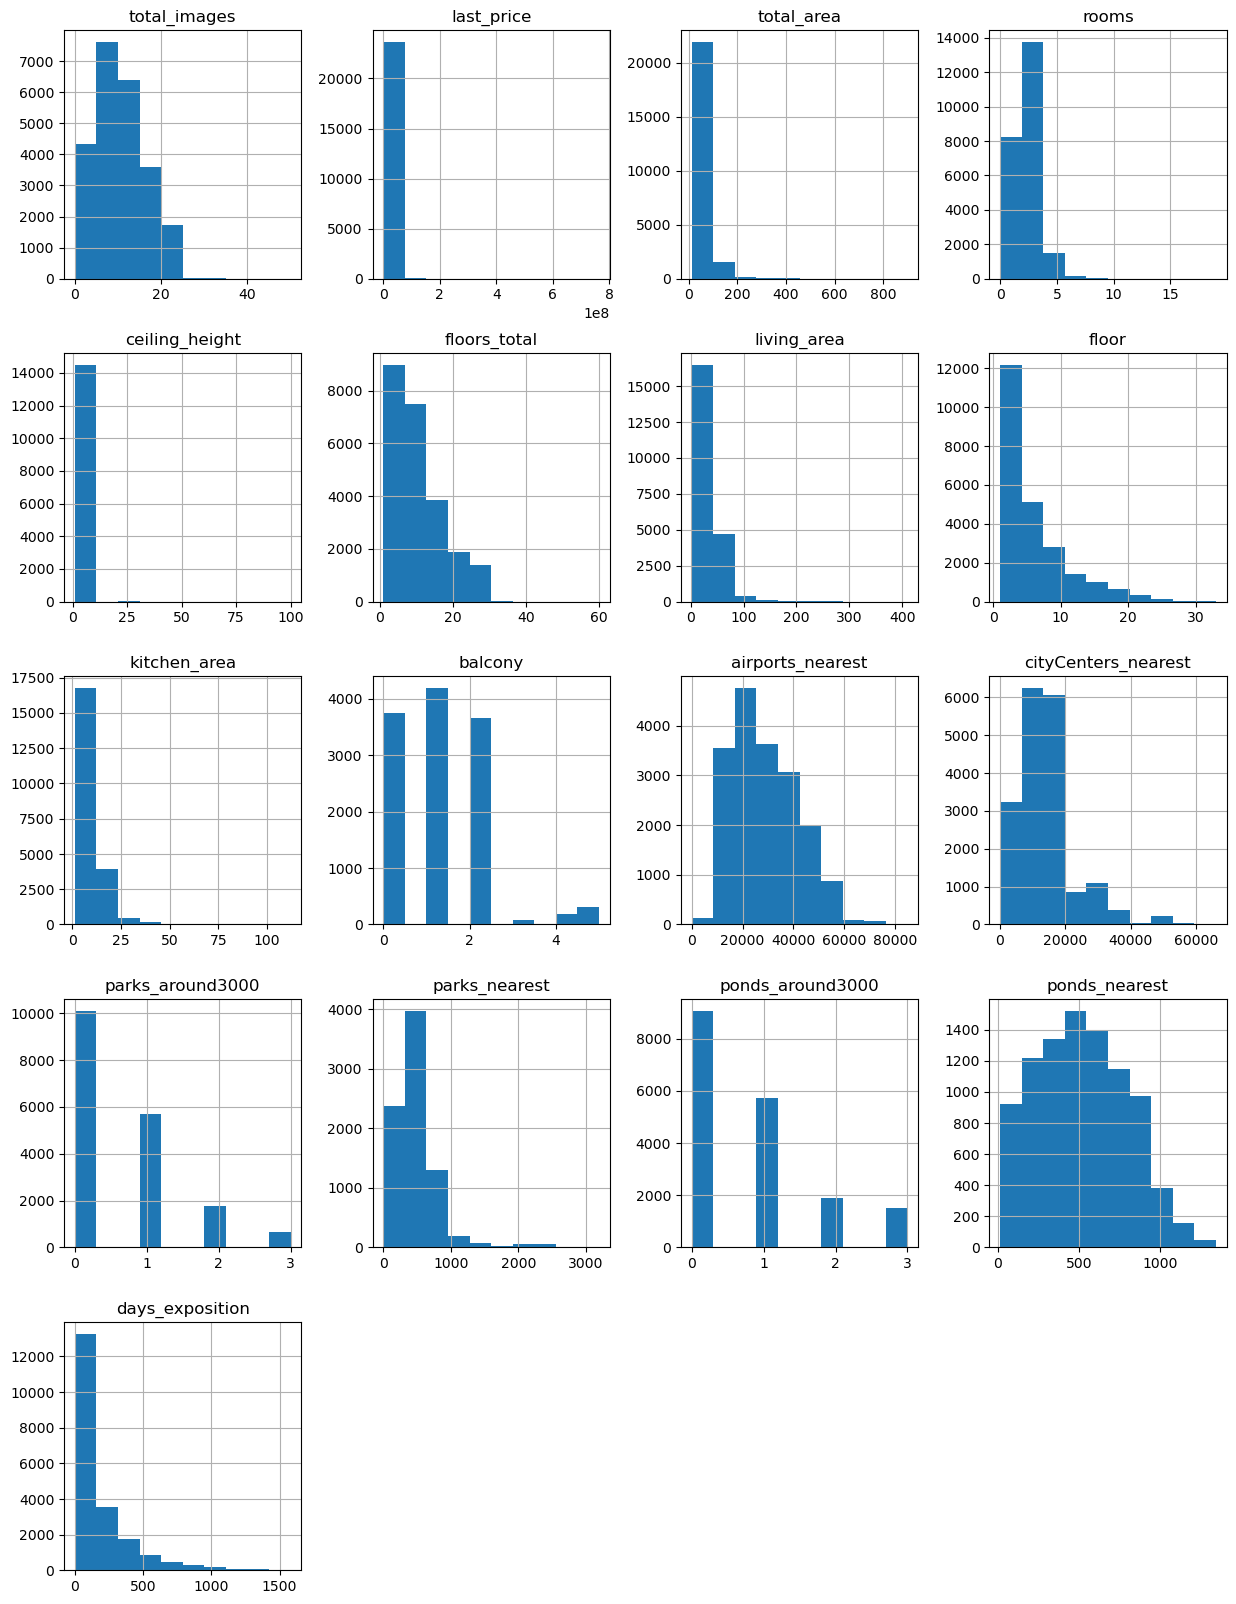

In [6]:
# гистограммы количественных столбцов для предварительного просмотра
df.hist(bins=10, figsize=(15, 20))
plt.show()

### Вывод

После первичного просмотра базы данных обнаружены следующие недочёты:
- Данные с типом *object*: `is_apartment` и `locality_name` имеют пропуски. Также названия населённых пунктов нужно проверить на неявные дубликаты. Заменить тип данных *first_day_exposition* на *datetime*.
- Столбцы, связанные с параметрами квартиры, имеют пропуски: `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`. Также поменять тип данных в количестве этажей и количестве балконов.
- Столбцы, связанные с местоположением квартиры, имеют большие пропуски: `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`. На диаграммах из-за этого сильная "дрожь".

## Предобработка данных

### Переименование колонок к одному виду

In [7]:
# передаём словарь с названиями колонок, которые нужно заменить и на какие названия
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 
                        'parks_around3000': 'parks_around_3000', 
                        'ponds_around3000': 'ponds_around_3000',
                        'studio': 'is_studio',
                        'open_plan': 'is_open_plan'
                       })

df.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Удаляем пропуски данных, которые могут сильно повлиять на результат

`locality_name`: удаляем строки, где не указан населённый пункт, т.к. дальнейшая обработка таких строк невозможна.

In [8]:
# переводим названия населённых пунктов к нижнему регистру для удобства обработки
df['locality_name'] = df['locality_name'].str.lower()

# удаляем строки, где нет необходимых данных
df = df.dropna(subset=['locality_name'])

### Убираем неявные дубликаты в наименованиях населённых пунктов

In [9]:
# список слов, которые можно удалить, чтобы убрать виды населённых пунктов из названий
list_deleted = ['поселок ', 'посёлок ', 'село ', 'деревня ', 'станции ', 'городской ', 'городского типа ', 'коттеджный ',\
                'садовое товарищество ', 'при железнодорожной ', 'садоводческое некоммерческое товарищество ']

# удаляем виды населённых пунктов
for i in range(len(list_deleted)):
    df['locality_name'] = df['locality_name'].str.replace(list_deleted[i], '')

df['locality_name'].value_counts()

санкт-петербург            15721
мурино                       590
кудрово                      472
шушары                       440
всеволожск                   398
                           ...  
пельгора                       1
каложицы                       1
платформа 69-й километр        1
почап                          1
дзержинского                   1
Name: locality_name, Length: 305, dtype: int64

### Пропуски `is_apartment`

`is_apartment`: Заменяем пропущенные значения на *False*, т.к. люди, размещающие объявления квартир, не всегда указывали, что продают не апартаменты.

In [10]:
# Проставляем пропуски в определителе апартаментов - Нет
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False
df['is_apartment'].value_counts()

False    23600
True        50
Name: is_apartment, dtype: int64

### Пропуски в числовых данных

Есть менее 100 пропусков в столбце `floors_total` - удалим, т.к. не можем быть уверены, что все пользователи в таких случаях живут на крайних этажах.

Максимальное количество этажей в Санкт-Петербурге  - 37 в ЖК "Князь Александр Невский".\
Выше 37 только два объявления - удаляем.

In [11]:
# Удаляем строки, где пропущены значения количества этажей в здании
df = df.dropna(subset=['floors_total'])

# Проверяем на максимальный этаж по Санкт-Петербургу
display(df[df['floors_total'] > 37])

# Удаляем аномальные строки
df = df[df['floors_total'] < 38]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000.0,45.5,2018-06-28T00:00:00,2,2.88,60.0,27.4,4,False,False,False,7.4,NaN,кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,52.0,10.5,18,False,False,False,14.0,NaN,санкт-петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


`living_area`, `kitchen_area` имеют пропуски. 
Найдём коэффициент средней жилой площади и средней площади кухонь к средней общей площади и заполним пропуски.
`kitchen_area` в квартирах-студиях предварительно заполним 0, т.к. кухня в объектах такого типа является частью жилой площади.

In [12]:
# находим средние арифметические значения
living_area_mean = df.loc[df['living_area'].isnull() == False, 'living_area'].mean()
kitchen_area_mean = df.loc[df['kitchen_area'].isnull() == False, 'kitchen_area'].mean()
total_area_mean = df['total_area'].mean()

# находим соотношения жилой площади к общей и соотношение площади кухни к общей площади
ratio_living_area = living_area_mean / total_area_mean
ratio_kitchen_area = kitchen_area_mean / total_area_mean

# заполняем пропуски площадь кухонь в квартирах-студиях 0 кв.м.
df.loc[df['is_studio'] == True, 'kitchen_area'] = 0

# заполняем остальные пропуски рассчитанными коэффициентами, умноженными на общую площадь отдельно взятой недвижимости
df.loc[df['living_area'].isnull(), 'living_area'] = ratio_living_area * df.loc[df['living_area'].isnull(), 'total_area']
df.loc[df['kitchen_area'].isna(), 'kitchen_area'] = ratio_kitchen_area * df.loc[df['kitchen_area'].isna(), 'total_area']

- Количество балконов `balcony` заполняем 0, т.к. при наличии пользователь указал бы их наличие.
- Высоту потолка `ceiling_height` заполним средним арифметическим

In [13]:
# заполняем пропуски в балконах нулями
df.loc[df['balcony'].isna(), 'balcony'] = 0

# заполняем пропуски в высоте потолка средним арифметическим
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df.loc[df['ceiling_height'].isnull() == False, 'ceiling_height'].mean()
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23563.000000,2.356300e+04,23563.000000,23563.000000,23563.000000,23563.000000,23563.000000,23563.000000,23563.000000,23563.000000,18039.000000,18062.000000,18063.000000,8028.000000,18063.000000,9035.000000,20392.000000
mean,9.878369,6.540283e+06,60.324316,2.070704,2.771284,10.672028,34.593653,5.877690,10.469691,0.593727,28795.369921,14190.769184,0.611471,490.561286,0.769418,518.278915,180.748774
std,5.681377,1.091137e+07,35.658196,1.078614,0.989308,6.581766,22.374071,4.871037,6.076629,0.960685,12629.725100,8609.815411,0.802060,341.594803,0.938557,278.023121,219.741477
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18561.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.647000e+06,52.000000,2.000000,2.771284,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.771284,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,37.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Картографические данные

Картографические данные имеют большую долю пропусков. Заполнять их не будем, т.к. просчитать заполнение сложно и может привести к ухудшению данных.

### Меняем типы данных

- `first_day_exposition` переводим в *datetime*
- `is_apartment` переводим в *bool*
- `balcony`, `days_exposition`, `floors_total` переводим в *int*

In [14]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d')

df = df.astype(
    {'is_apartment': bool, 'balcony': 'int32', 'floor': 'int32', 'floors_total': 'int32',
     'total_images': 'int32', 'rooms': 'int32', 'last_price': 'float32', 'total_area': 'float32',
     'ceiling_height': 'float32', 'living_area': 'float32', 'kitchen_area': 'float32'}
)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23563 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23563 non-null  int32         
 1   last_price            23563 non-null  float32       
 2   total_area            23563 non-null  float32       
 3   first_day_exposition  23563 non-null  datetime64[ns]
 4   rooms                 23563 non-null  int32         
 5   ceiling_height        23563 non-null  float32       
 6   floors_total          23563 non-null  int32         
 7   living_area           23563 non-null  float32       
 8   floor                 23563 non-null  int32         
 9   is_apartment          23563 non-null  bool          
 10  is_studio             23563 non-null  bool          
 11  is_open_plan          23563 non-null  bool          
 12  kitchen_area          23563 non-null  float32       
 13  balcony         

### Удаление аномальных значений

#### Цена квартир, общая площадь и количество комнат

Актуальные цены на Яндекс.Недвижимость начинаются от 280 тыс. рублей. Возьмём нижнюю планку в 200 тыс. рублей и удалим, что стоит меньше.\
Также переведём цены за квартиры в "тыс. рублей", чтобы на графиках были более удобные отображения.

In [15]:
# считаем количество квартир стоимостью ниже 200 тыс. рублей и удаляем их
print('Количество квартир дешевле 200 тыс. рублей:', df.query('last_price < 200000')['last_price'].count())

# удаляем квартиры дешевле 200 тыс. рублей
df = df.loc[df['last_price'] > 200000]

# переводим стоимость квартир в миллионы рублей, т.к. меньшие разряды здесь ни к чему
# также это поможет для более удачной визуализации
df['last_price'] = df['last_price'] / 1000000
df = df.rename(columns={'last_price': 'last_price_million'})

df.describe()

Количество квартир дешевле 200 тыс. рублей: 1


,total_images,last_price_million,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23562.000000,23562.000000,23562.000000,23562.000000,23562.000000,23562.000000,23562.000000,23562.000000,23562.000000,23562.000000,18038.000000,18061.000000,18062.000000,8027.000000,18062.000000,9035.000000,20391.000000
mean,9.878491,6.540560,60.322250,2.070707,2.771285,10.671420,34.593761,5.876878,10.468417,0.593753,28794.947167,14191.046841,0.611449,490.522113,0.769461,518.278915,180.757246
std,5.681467,10.911519,35.657429,1.078636,0.989317,6.581244,22.374449,4.869547,6.073578,0.960698,12629.947564,8609.972907,0.802077,341.598050,0.938566,278.023121,219.743536
min,0.000000,0.430000,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18559.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.648500,52.000000,2.000000,2.771284,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13098.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000,69.699997,3.000000,2.771284,16.000000,42.099998,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,763.000000,900.000000,19.000000,100.000000,37.000000,409.700012,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Посмотрим также на максимальные значения по цене квартир, общей площади и количестве комнат - есть ли среди них аномалии или просто попались объявления элитных квартир, а также нетипичные помещения.

In [16]:
# смотрим количество строк выше средних значений по отдельным параметрам
print('цены выше 50 млн рублей:', df.loc[df['last_price_million'] > 50, 'last_price_million'].count())
print('общая площадь больше 250 кв.м.:', df.loc[df['total_area'] > 250, 'total_area'].count())
print('больше 7 комнат :', df.loc[df['rooms'] > 7, 'rooms'].count())

цены выше 50 млн рублей: 131
общая площадь больше 250 кв.м.: 111
больше 7 комнат : 31


Строки в пределах от 31 до 131 по отдельным параметрам.\
Удалим строки, где более 7 комнат и обшей площадью более 250 кв.м, т.к. их немного, при этом сильно влияют на расчёты.

In [17]:
# оставляем объявления с 7 и менее комнатами
df = df.query('rooms <= 7')

# оставляем квартиры с площадью менее или равной 250 кв.м.
df = df.query('total_area <= 250')

df.shape

(23436, 22)

In [18]:
#  проверим жилую площадь на минимальное значение для одного человека - 6 кв.м.
display(df.loc[df['living_area'] < 6])

# проверим превышение жилой площади и кухни над общей площадью
print('жилая площадь + кухня > общей площади:', df.query('living_area + kitchen_area > total_area')['total_area'].count())

# проверим квартриры, которые дороже 50 млн рублей и общей площадью меньше 100 кв.м.
display(df.query('last_price_million > 50 & total_area < 100').sort_values('last_price_million', ascending=False))

,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3242,7,4.44,41.000000,2017-07-02,1,2.771284,17,3.0,17,False,False,False,11.0,0,санкт-петербург,19272.0,13073.0,0.0,NaN,0.0,NaN,216.0
13915,20,6.35,52.000000,2018-02-06,2,3.000000,6,2.0,2,False,False,False,9.0,0,санкт-петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
17582,11,2.68,22.000000,2018-08-11,0,2.771284,25,5.0,8,False,True,False,0.0,2,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,70.0
21758,0,2.33,23.000000,2018-01-01,0,2.771284,24,2.0,22,False,True,False,0.0,0,мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
21943,15,6.10,77.599998,2019-02-28,4,2.500000,9,5.4,1,False,False,False,9.8,0,санкт-петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
23574,14,64.99,139.000000,2015-11-24,3,3.000000,8,3.0,8,False,False,False,16.0,1,санкт-петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0


жилая площадь + кухня > общей площади: 103


,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
10011,3,53.0,90.0,2019-03-21,3,3.15,5,73.0,3,False,False,False,12.0,0,санкт-петербург,24698.0,2385.0,3.0,389.0,3.0,564.0,40.0


По жилой площади 6 строк ниже минимума, остальные данные в строках выглядят реальными.\
Чтобы не терять данные - заменю жилую площадь на среднюю, помноженную на коэффициент относительно общей площади.

Есть 103 строки, где жилая площадь и кухня превышают общую площадь - удалим строки, т.к. меньше 1%.

По цене квартиры выше 50 млн рублей пропорциональны общей площади. Ниже 100 кв.м. со стоимостью выше 50 млн рублей найдена одна квартира - без выбросов.

In [19]:
# заменим жилую площадь на среднюю, помноженную на коэффициент относительно общей площади
df.loc[df['living_area'] < 6, 'living_area'] = ratio_living_area * df.loc[df['living_area'] < 6, 'total_area']

# удаляем строки, где жилая площадь и кухня превышают общую площадь
df = df.query('~(living_area + kitchen_area > total_area)')

#### Высота потолка

Минимальная высота потолка является 2,5 метра. Возможно, некоторые пользователи замеряли расстояние после ремонта, когда расстояние становится меньше - возьмём за нижнюю границу 2,2 метра.\
А максимальную установим в 10 метров, т.к. бывают двухэтажные квартиры.

In [20]:
display(df.loc[(df['ceiling_height'] < 2.2) | (df['ceiling_height'] > 10)].sort_values('last_price_million', ascending=True))

,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
16884,0,1.500,33.000000,2018-10-03,1,2.00,5,20.000000,5,False,False,False,6.000000,0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5712,5,1.500,42.799999,2017-08-14,2,1.20,2,27.500000,1,False,False,False,5.200000,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1.650,35.500000,2018-05-29,1,2.00,5,20.277012,5,False,False,False,6.214987,0,луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
14382,9,1.700,35.000000,2015-12-04,1,25.00,5,20.000000,2,False,False,False,8.000000,1,новый свет,NaN,NaN,NaN,NaN,NaN,NaN,206.0
19329,5,1.700,40.000000,2018-07-15,2,2.00,9,22.847338,8,False,False,False,7.002802,0,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
11285,0,1.950,37.000000,2019-03-20,1,25.00,5,17.000000,4,False,False,False,9.000000,2,луга,NaN,NaN,NaN,NaN,NaN,NaN,18.0
4212,1,2.120,35.430000,2017-12-18,1,2.00,18,16.600000,9,False,False,False,8.800000,2,тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
22960,17,2.300,53.599998,2018-10-18,2,2.00,2,19.000000,1,False,False,False,10.000000,0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2572,4,2.400,62.000000,2018-12-27,3,2.00,5,40.000000,4,False,False,False,6.000000,1,луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5246,0,2.500,54.000000,2017-10-13,2,27.00,5,30.000000,3,False,False,False,9.000000,2,мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0


Есть значения, где как будто пользователи ошиблись, добавив 0 - исправим значения от 24 до 27, умножив на 0,1.\
Остальные строки удалим, т.к. похожи на выбросы - квартиры с высокими потолками не стоят намного дороже, хотя должны.

In [21]:
# уменьшили высоту потолка в объявлениях с высотой от 22м до 28м в 10 раз
df.loc[(df['ceiling_height'] >= 22) & (df['ceiling_height'] <= 28), 'ceiling_height'] *= 0.1
display(df.loc[(df['ceiling_height'] < 2.2) | (df['ceiling_height'] > 10)].sort_values('last_price_million', ascending=True))

# удалили строки, где высота потолка меньше 2,2м и выше 10м
df = df.loc[(df['ceiling_height'] > 2.2) & (df['ceiling_height'] < 10)]
df.describe()

,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
16884,0,1.500,33.000000,2018-10-03,1,2.00,5,20.000000,5,False,False,False,6.000000,0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5712,5,1.500,42.799999,2017-08-14,2,1.20,2,27.500000,1,False,False,False,5.200000,0,мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
5850,9,1.650,35.500000,2018-05-29,1,2.00,5,20.277012,5,False,False,False,6.214987,0,луга,NaN,NaN,NaN,NaN,NaN,NaN,100.0
19329,5,1.700,40.000000,2018-07-15,2,2.00,9,22.847338,8,False,False,False,7.002802,0,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
4212,1,2.120,35.430000,2017-12-18,1,2.00,18,16.600000,9,False,False,False,8.800000,2,тосно,NaN,NaN,NaN,NaN,NaN,NaN,36.0
22960,17,2.300,53.599998,2018-10-18,2,2.00,2,19.000000,1,False,False,False,10.000000,0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2572,4,2.400,62.000000,2018-12-27,3,2.00,5,40.000000,4,False,False,False,6.000000,1,луга,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19098,7,2.700,56.000000,2018-02-04,3,2.00,5,46.000000,1,False,False,False,6.000000,0,выборг,NaN,NaN,NaN,NaN,NaN,NaN,282.0
3148,14,2.900,75.000000,2018-11-12,3,32.00,3,53.000000,2,False,False,False,8.000000,0,волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
552,11,2.999,33.500000,2017-03-30,1,2.00,15,17.500000,6,False,False,False,6.500000,0,санкт-петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0


,total_images,last_price_million,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,17834.000000,17855.000000,17856.000000,7906.000000,17856.000000,8907.000000,20186.000000
mean,9.870625,6.176234,58.903103,2.048730,2.742175,10.686299,33.715576,5.873799,10.310096,0.594072,28816.218683,14248.539065,0.606295,491.480142,0.764729,519.623555,180.330477
std,5.672189,6.991754,28.604506,1.012356,0.223393,6.577230,18.561470,4.867886,5.538591,0.960140,12657.261867,8606.611920,0.797021,341.394923,0.935040,278.045270,219.221741
min,0.000000,0.430000,13.000000,0.000000,2.250000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18539.000000,9359.500000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000,52.000000,2.000000,2.771284,9.000000,30.000000,4.000000,9.000000,0.000000,26785.500000,13140.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000,69.000000,3.000000,2.771284,16.000000,42.000000,8.000000,11.900000,1.000000,37312.250000,16299.500000,1.000000,613.000000,1.000000,733.000000,231.000000
max,50.000000,330.000000,250.000000,7.000000,8.300000,36.000000,184.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Расстояние до парка

По диаграмме видно, в отличие от столбца `ponds_nearest`, где расстояние не превышает 1500 метров, `parks_nearest` превышает 3000 метров, что противоречит названию столбца.\
Заменим значения в этих строках на *None*, как в строках, где значение `parks_around3000` равно 0.

In [22]:
# выводим строки, где есть превышение в столбце parks_nearest
display(df.query('parks_nearest > 3000'))

# заменяем значение на None как и других строках, где значение parks_around3000 равно 0
df.loc[df['parks_nearest'] > 3000, 'parks_nearest'] = None
df.describe()

,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1590,3,7.50,70.0,2017-07-11,2,2.771284,18,37.000000,13,False,False,False,10.0,0,санкт-петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
10959,9,3.00,31.1,2017-03-21,1,2.771284,5,17.700001,2,False,False,False,5.5,0,санкт-петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
19208,17,14.95,187.0,2017-10-12,5,3.000000,2,80.000000,2,False,False,False,17.0,1,санкт-петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
19430,9,3.90,30.5,2018-02-22,1,2.600000,5,16.500000,1,False,False,False,5.5,0,санкт-петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0


,total_images,last_price_million,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
count,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,23312.000000,17834.000000,17855.000000,17856.000000,7902.000000,17856.000000,8907.000000,20186.000000
mean,9.870625,6.176234,58.903103,2.048730,2.742175,10.686299,33.715576,5.873799,10.310096,0.594072,28816.218683,14248.539065,0.606295,490.152493,0.764729,519.623555,180.330477
std,5.672189,6.991754,28.604506,1.012356,0.223393,6.577230,18.561470,4.867886,5.538591,0.960140,12657.261867,8606.611920,0.797021,336.336303,0.935040,278.045270,219.221741
min,0.000000,0.430000,13.000000,0.000000,2.250000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18539.000000,9359.500000,0.000000,288.000000,0.000000,295.000000,45.000000
50%,9.000000,4.600000,52.000000,2.000000,2.771284,9.000000,30.000000,4.000000,9.000000,0.000000,26785.500000,13140.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.700000,69.000000,3.000000,2.771284,16.000000,42.000000,8.000000,11.900000,1.000000,37312.250000,16299.500000,1.000000,612.000000,1.000000,733.000000,231.000000
max,50.000000,330.000000,250.000000,7.000000,8.300000,36.000000,184.000000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,2984.000000,3.000000,1344.000000,1580.000000


#### Расстояние до аэропорта

Проверим есть ли строки, где расстояние до аэропорта равно нулю.

In [23]:
# строки, где квартиры находятся в 0 метров от аэропорта
display(df.query('airports_nearest < 50'))

# удаляем такие строки
df = df.query('airports_nearest != 0')

,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7.0,34.700001,2018-09-23,1,2.7,9,19.799999,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23311 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23311 non-null  int32         
 1   last_price_million    23311 non-null  float64       
 2   total_area            23311 non-null  float32       
 3   first_day_exposition  23311 non-null  datetime64[ns]
 4   rooms                 23311 non-null  int32         
 5   ceiling_height        23311 non-null  float32       
 6   floors_total          23311 non-null  int32         
 7   living_area           23311 non-null  float32       
 8   floor                 23311 non-null  int32         
 9   is_apartment          23311 non-null  bool          
 10  is_studio             23311 non-null  bool          
 11  is_open_plan          23311 non-null  bool          
 12  kitchen_area          23311 non-null  float32       
 13  balcony         

### Вывод

Узнали, что датафрейм содержит объявления о продаже недвижимости в Санкт-Петербурге и области за период с ноября 2014 по начало мая 2019 годов.

Внимательно рассмотрели данные.\
Проверили выбивающиеся из общего диапазона значения и исключили, либо обработали их для дальнейшего исследования.

Нашли уникальные данные с высокими показателями по общей площади, цене квартиры и количеству комнат.\
Часть данных, к примеру с большим количеством комнат и большой площадью квартир - удалили, т.к. являются аномалиями объявлений и сильно повлияют на дальнейшие расчёты.\
Также избавились от строк, где сумма жилой площади и кухни превысила общую площадь.

## Посчитаем и добавим в таблицу новые столбцы

### Цена квадратного метра

In [25]:
df['price_per_meter'] = df['last_price_million'] / df['total_area']

### День недели, месяц и год публикации

In [26]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

###  Категории по этажу квартиры: первый, последний и другой

In [27]:
df['floor_type'] = ['other']*len(df)
df.loc[df['floor'] == 1, 'floor_type'] = 'first'
df.loc[df['floor'] == df['floors_total'], 'floor_type'] = 'last'

df.sample(3)

,total_images,last_price_million,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,price_per_meter,weekday_exposition,month_exposition,year_exposition,floor_type
1311,16,4.90,39.299999,2018-08-18,1,2.800000,15,17.4,5,False,False,False,9.8,0,санкт-петербург,43088.0,13239.0,1.0,604.0,0.0,NaN,10.0,0.124682,5,8,2018,other
9014,6,3.50,38.000000,2017-07-25,1,3.000000,18,19.4,10,False,False,False,10.0,0,санкт-петербург,43356.0,22672.0,0.0,NaN,1.0,1124.0,3.0,0.092105,1,7,2017,other
17669,7,7.35,72.000000,2018-02-01,3,2.771284,10,42.0,4,False,False,False,9.0,0,санкт-петербург,50355.0,15683.0,0.0,NaN,0.0,NaN,427.0,0.102083,3,2,2018,other


### Cоотношение жилой к общей площади, а также отношение площади кухни к общей

In [28]:
df['living_to_total_area'] = df['living_area'] / df['total_area']
df['kitchen_to_total_area'] = df['kitchen_area'] / df['total_area']

### Расстояние до центра города

In [29]:
df['city_centers_distance'] = df['city_centers_nearest'] / 1000
df['city_centers_distance'] = round(df['city_centers_distance'], 0)

### Вывод
Подготовили дополнительные параметры для более детального исследовательского анализа.

## Приступаем к исследовательскому анализу данных

**Напишем функции для изучения количественных столбцов и отображения их в виде диаграммы.**

In [30]:
def build_hist(data):
    plt.figure(figsize=(10,3))
    data.hist(bins=100)
    plt.ticklabel_format(style='plain')
    plt.show()

### Изучение параметров квартир

#### Общая площадь

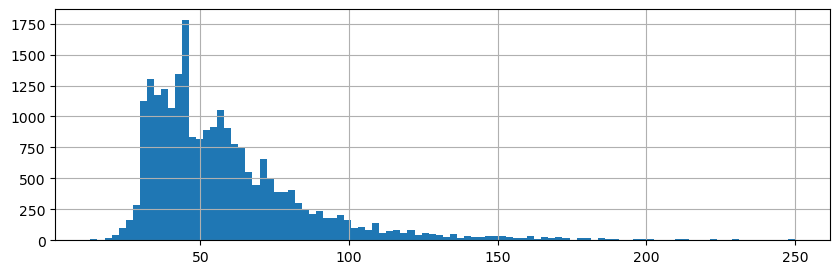

In [31]:
build_hist(df.total_area)

Общая площадь квартир в основном до 100 кв.м.\
Около 1000 квартир до 200 кв.м.\
Выше 200 кв.м. квартир очень мало - выглядит реалистично.

#### Жилая площадь

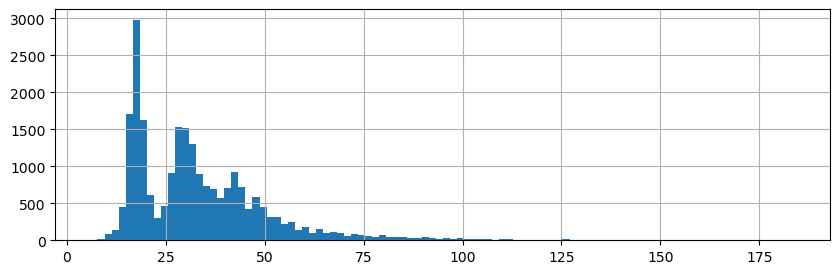

In [32]:
build_hist(df.living_area)

Есть провал в значениях около 25 кв.м. В предобработке заполнили около 2 тыс. строк, но это картину не поменяло.\
Могу предположить, что пользователи не однотипно замеряли жилую площадь своих квартир, либо есть типичные метражи квартир, которые используют застройщики.

#### Площадь кухни

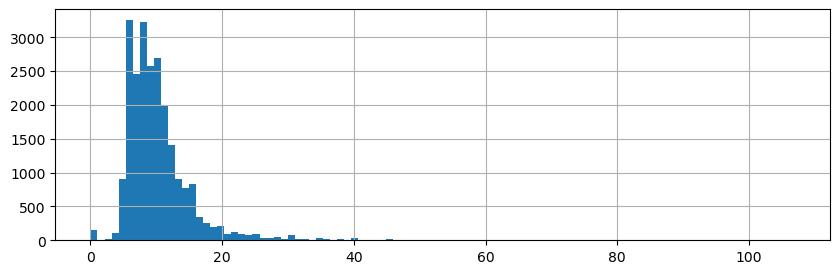

In [33]:
build_hist(df.kitchen_area)

Кухни также идут в соотношении к общей площади.\
Есть небольшое количество кухонь равных нулю - квартиры-студии.

#### Цена объекта

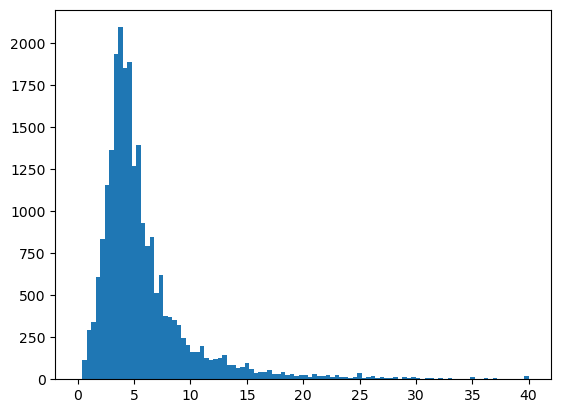

In [34]:
plt.hist(df.last_price_million, bins=100, range=(0, 40))
plt.show()

Цена распределена корректно.\
Есть сверхдорогие квартиры, но так как присутствуют квартиры больших площадей и квартиры люкс-класса, считаем, что выбросов нет.

#### Количество комнат

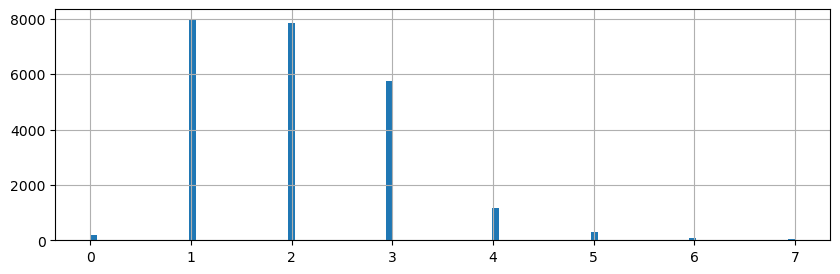

In [35]:
build_hist(df.rooms)

Количество комнат распределены в норме, больше 4-комнатых квартир очень мало объявлений - значения нормальные.

#### Высота потолков

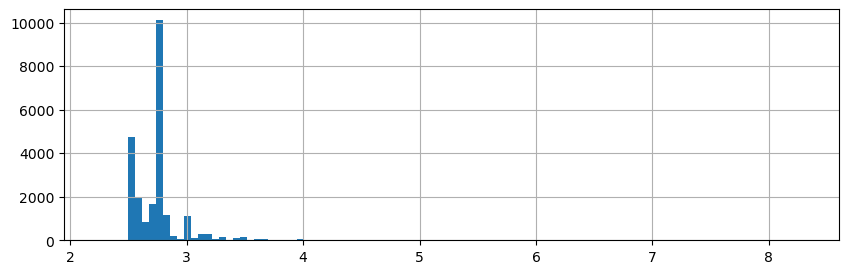

In [36]:
build_hist(df.ceiling_height)

Есть пики в значениях минимальных потолков по СНиП - 2,5м и 2,7м. Считаю, что данные корректны.

#### Этаж квартиры

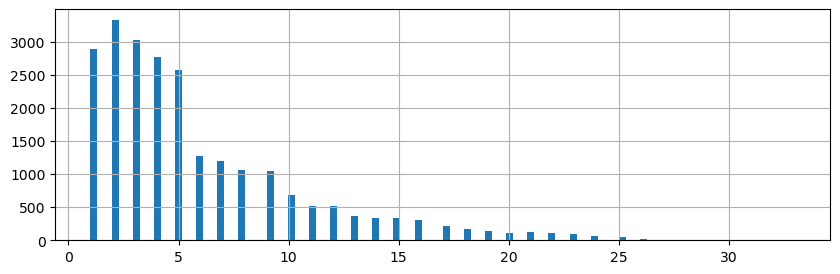

In [37]:
build_hist(df.floor)

Этажность распределилась нормально. Выбросы были предварительно отсортированы.

#### Тип этажа квартиры

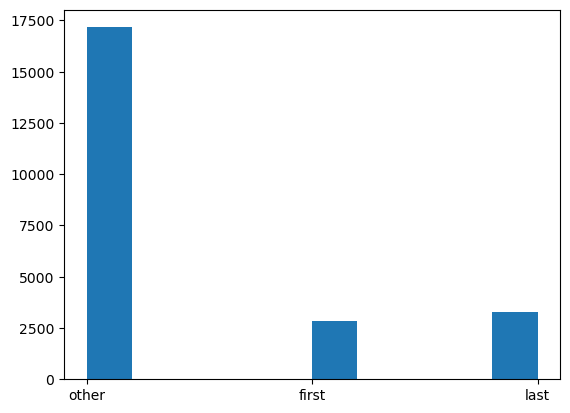

In [38]:
plt.hist(df.floor_type)
plt.show()

Категории этажей в нормальном распределении, как по теории с монетками.

#### Общее количество этажей в доме

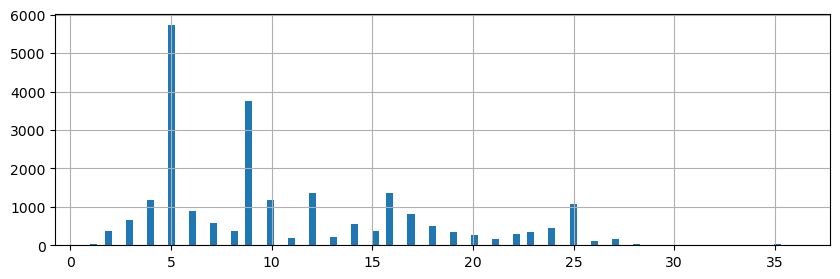

In [39]:
build_hist(df.floors_total)

Значения выглядят адекватными. Пики на типичных этажностях домов - пятиэтажки и 9-этажные.

#### Расстояние до центра города в метрах

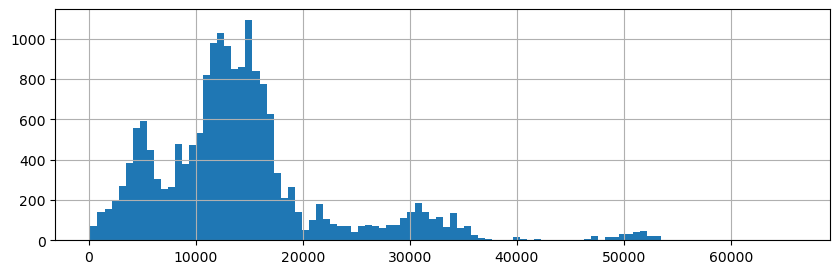

In [40]:
build_hist(df.city_centers_nearest)

Картографические данные оставляем без изменений для исследования.

#### Расстояние до ближайшего аэропорта

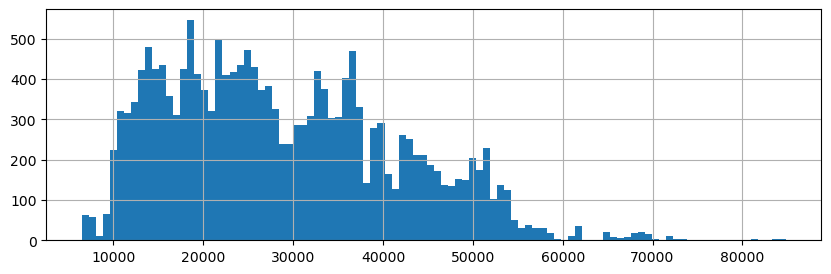

In [41]:
build_hist(df.airports_nearest)

Расстояния в пределах Ленинградской области, без выбросов.

#### Расстояние до ближайшего парка

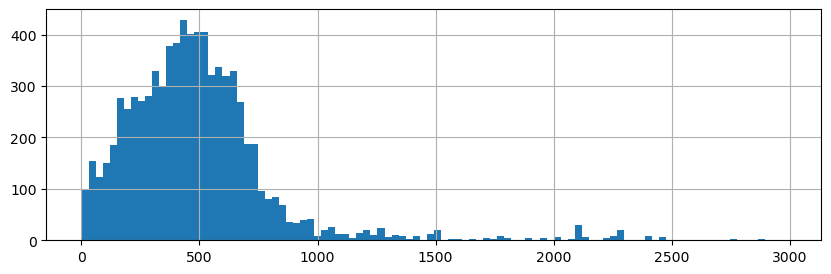

In [42]:
build_hist(df.parks_nearest)

Есть жилые комплексы, которые расположены вплотную к парку. Выбросы выше 3000 метров предварительно убраны.

#### День публикации объявления

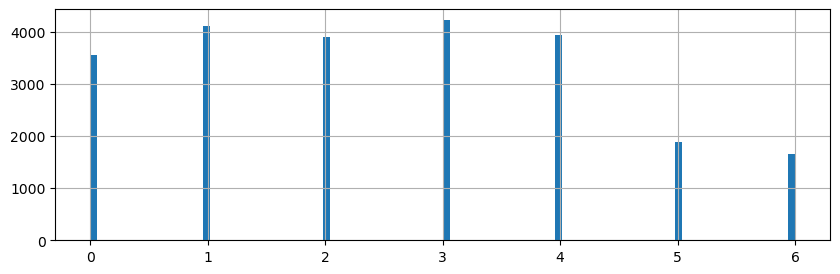

In [43]:
build_hist(df.weekday_exposition)

Пользователи чаще публикуют объявления по будням.

#### Месяц публикации объявления

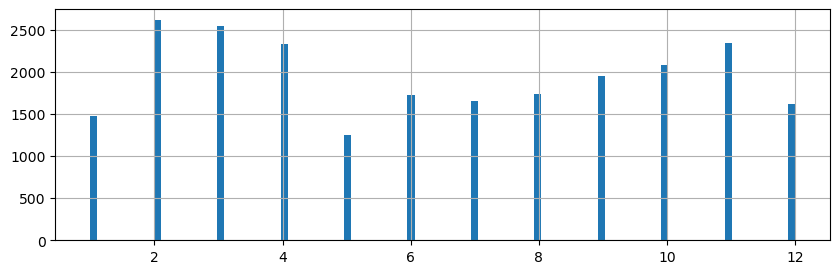

In [44]:
build_hist(df.month_exposition)

Январь, май и декабрь - минимальные значения. В феврале - пик с постепенным снижением к маю, далее такой же плавный подъём к ноябрю.\
В месяцы малой активности много праздников (январь и май) или предновогодние сборы (декабрь), возможно это связано.

### Как быстро продавались квартиры?

180.33643794897202

95.0

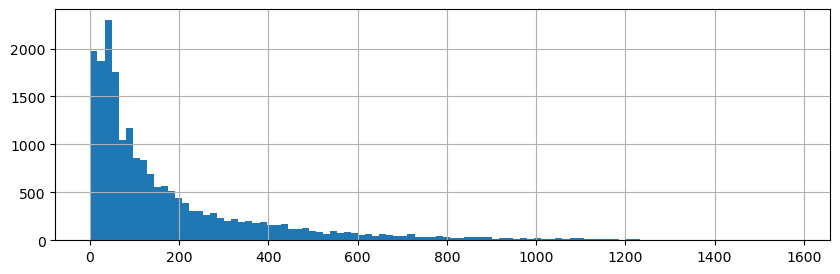

In [45]:
# среднее количество дней, когда были размещены объявления
display(df['days_exposition'].mean())

# медианное количество дней, когда были размещены объявления
display(df['days_exposition'].median())

build_hist(df.days_exposition)

Медианное значение почти в 2 раза меньше, чем среднее арифметическое.\
Из этого можно сделать вывод, что быстрые продажи проводились в пределах 3 месяцев.\
Объявления, которые размещены более года, скорее всего содержат неактивную часть объявлений.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

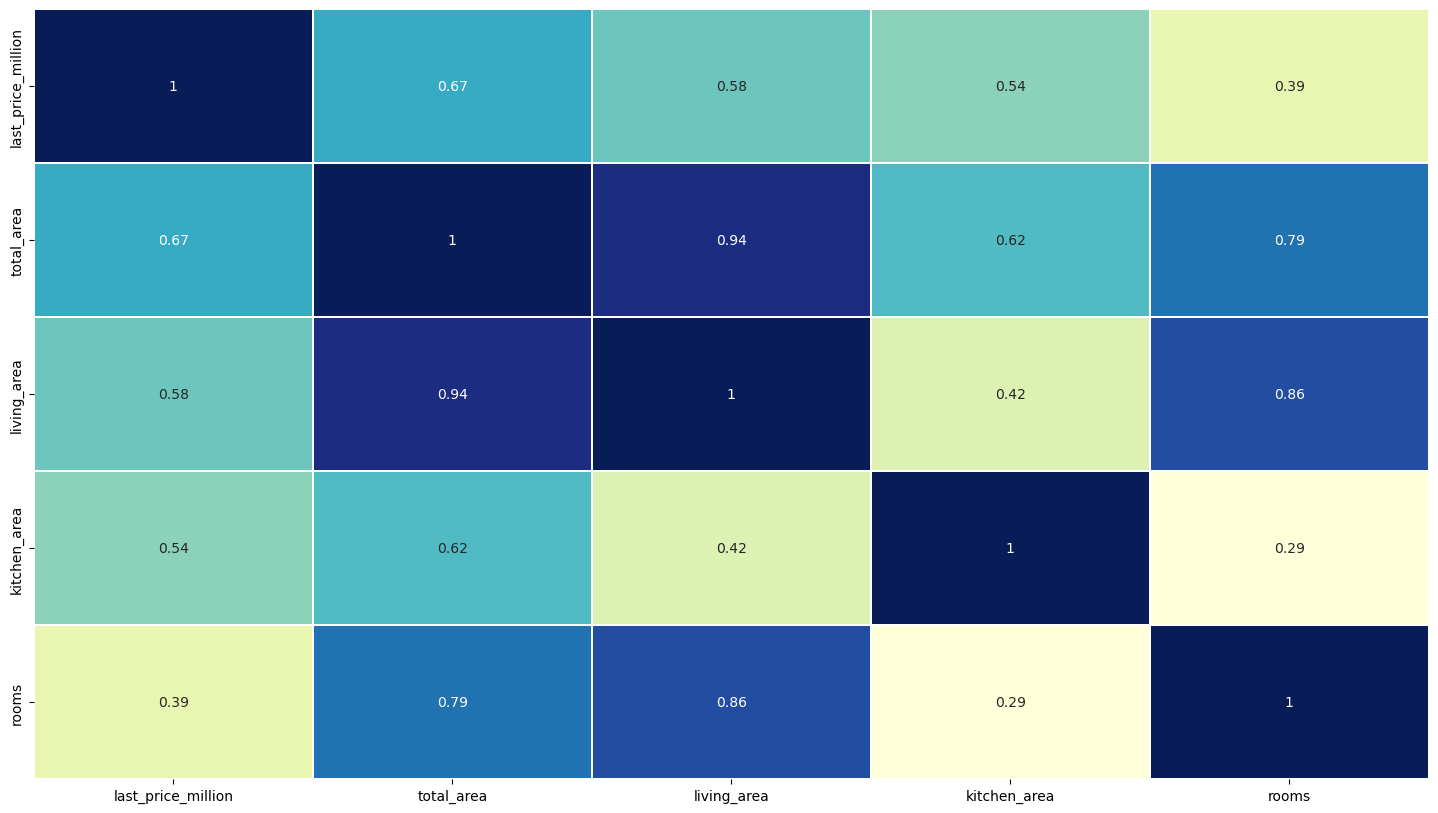

In [46]:
plt.figure(figsize=(18, 10))
sns.heatmap(df[['last_price_million', 'total_area', 'living_area', 'kitchen_area', 'rooms']].corr(), 
            annot=True, cmap='YlGnBu', cbar=False, robust=True, linewidths=.2)
plt.show()

Сильнее всего коррелирует общая площадь квартир со стоимостью. Жилая площадь и площадь кухни немного меньше зависит.\
Что в целом логично - квартиры обычно продаются за квадратный метр, а планировки жилого помещения и кухни бывают разные.

А вот с комнатами корреляция уже не такая сильная, т.к. могут быть большие комнаты или проведена перепланировка.

In [47]:
# подготовим таблицу для создания сводных
pivot_list = df[['weekday_exposition', 'month_exposition', 'year_exposition', 'floor_type', 'price_per_meter']]
# перевёл цену в тыс.рублей за кв.м.
pivot_list['price_per_meter'] = round(pivot_list['price_per_meter'] * 1000, 0)
pivot_list.columns = ['День недели', 'Месяц', 'Год', 'Тип этажа', 'Средняя цена тыс.руб./кв.м.']

# подготовим сводные
weekday = pivot_list.groupby(['День недели']).agg({'Средняя цена тыс.руб./кв.м.': 'mean'})
weekday['День недели'] = ['Пн','Вт','Ср','Чт','Пт','Сб','Вс']

month = pivot_list.groupby(['Месяц']).agg({'Средняя цена тыс.руб./кв.м.': 'mean'})
month['Месяц'] = month.index

year = pivot_list.groupby(['Год']).agg({'Средняя цена тыс.руб./кв.м.': 'mean'})
year['Год'] = year.index

floor_type = pivot_list.groupby(['Тип этажа']).agg({'Средняя цена тыс.руб./кв.м.': 'mean'})
floor_type['Тип этажа'] = floor_type.index

C:\Users\eugen\AppData\Local\Temp\ipykernel_10084\636317617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pivot_list['price_per_meter'] = round(pivot_list['price_per_meter'] * 1000, 0)


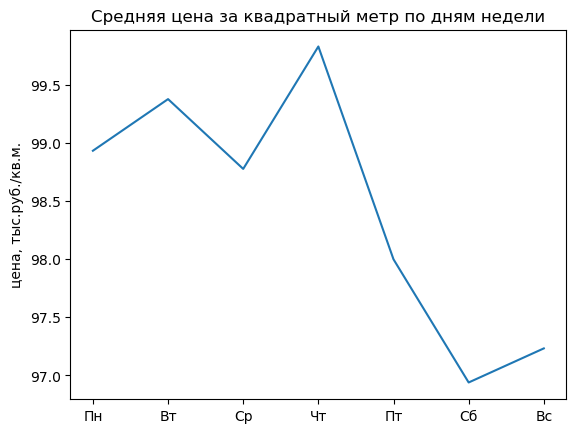

In [48]:
plt.plot(weekday['День недели'], weekday['Средняя цена тыс.руб./кв.м.'])
plt.title('Средняя цена за квадратный метр по дням недели')
plt.ylabel('цена, тыс.руб./кв.м.')
plt.show()

По графику можно сделать вывод, что более дешёвые квартиры выставляют в воскресенье.\
Возможно, в выходные выставляется больше квартир из провинции, в то время как средний класс и состоятельные люди могут поручить это дело риелторам, которые работают по будням.

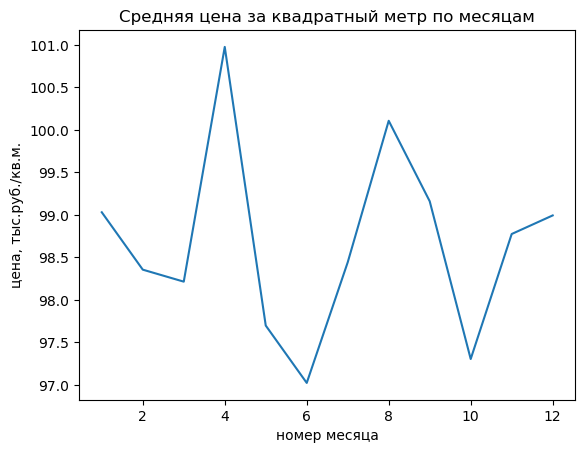

In [49]:
plt.plot(month['Месяц'], month['Средняя цена тыс.руб./кв.м.'])
plt.title('Средняя цена за квадратный метр по месяцам')
plt.ylabel('цена, тыс.руб./кв.м.')
plt.xlabel('номер месяца')
plt.show()

Есть пик в апреле, августе-сентябре и в декабре-январе.\
Скорее всего есть место сезонным изменениям цен на квартиры.

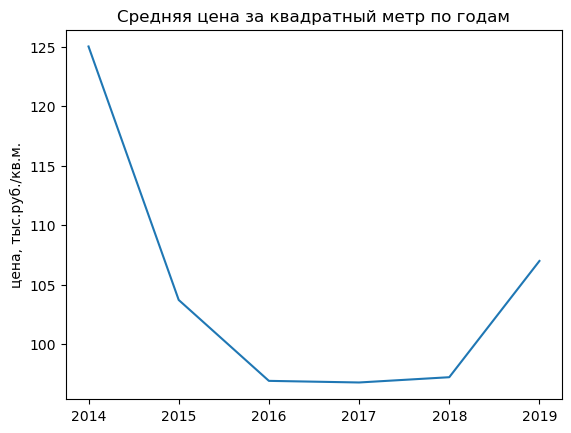

In [50]:
plt.plot(year['Год'], year['Средняя цена тыс.руб./кв.м.'])
plt.title('Средняя цена за квадратный метр по годам')
plt.ylabel('цена, тыс.руб./кв.м.')
plt.show()

В 2014 году был кризис, цены пару лет падали из-за низкого спроса.\
В период 2016-2018 годы стоимость жилья за квадратный метр держалась на одном уровне.\
В 2018 году государство ввело гопрограмму по ипотекам для молодых семей - в 2019 году началось повышение цен из-за увеличения спроса.

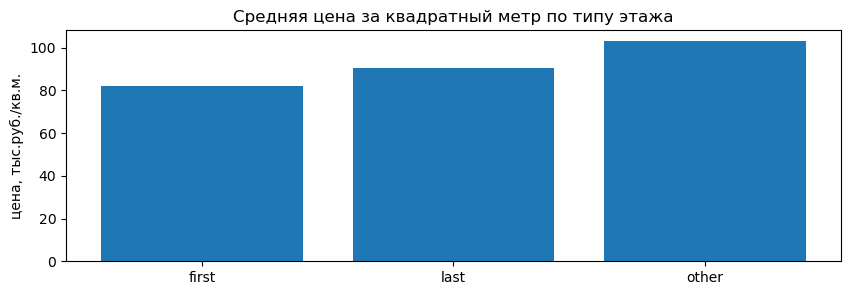

In [51]:
plt.figure(figsize=(10,3))
plt.bar(floor_type['Тип этажа'], floor_type['Средняя цена тыс.руб./кв.м.'])
plt.title('Средняя цена за квадратный метр по типу этажа')
plt.ylabel('цена, тыс.руб./кв.м.')
plt.show()

Цена за квадратный метр в квартирах на первом этаже - самая низкая.\
Чуть дороже стоят квартиры на последнем этаже.\
Остальные этажи более популярны и стоят дороже.

### Какие населённые пункты с самой высокой и низкой стоимостью квадратного метра?

In [52]:
# создадим сводную для 10 населённых пунктов с самым большим количеством объявлений
df_top = df.pivot_table(
    index='locality_name', values=['price_per_meter', 'last_price_million'],
    aggfunc={'price_per_meter':['count', 'median', 'mean'], 'last_price_million': ['median', 'mean']}
).sort_values(
    by=[('price_per_meter','count')], ascending=False
).head(10)

df_top.columns = ['Средняя стоимость жилья', 'Медианная стоимость жилья',
                  'Количество объявлений', 'Средняя цена за кв.м.', 'Медианная цена за кв.м.']

# отсортируем по средней цене за квадратный метр
df_top.sort_values('Средняя цена за кв.м.', ascending=False)

,Средняя стоимость жилья,Медианная стоимость жилья,Количество объявлений,Средняя цена за кв.м.,Медианная цена за кв.м.
locality_name,,,,,
санкт-петербург,7.530563,5.500,15451,0.113915,0.104650
пушкин,6.294480,5.150,367,0.103131,0.100000
кудрово,4.360365,3.890,468,0.095295,0.095675
парголово,4.491106,4.115,326,0.090135,0.091580
мурино,3.694561,3.400,578,0.085959,0.086176
шушары,4.111660,3.950,438,0.078547,0.076748
колпино,3.870742,3.600,336,0.075389,0.074724
всеволожск,3.784329,3.450,393,0.068646,0.065789
гатчина,3.485542,3.090,303,0.068625,0.067647


По цене за один квадратный метр отслеживается тенденция - чем дальше от Санкт-Петербурга, тем дешевле стоит квадратный метр жилья.\
Из топ-10 населённых пунктов только Всеволожск, Гатчина и Выборг не являются ближайшими пригородами СПб, и то занимают с 8 по 10 места.

### Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге?

,city_centers_distance,price_per_meter
0,0.000000,0.22
1,1.000000,0.18
2,2.000000,0.16
3,3.000000,0.12
4,4.000000,0.13
5,5.000000,0.14
6,6.000000,0.15
7,7.000000,0.15
8,8.000000,0.12
9,9.000000,0.11


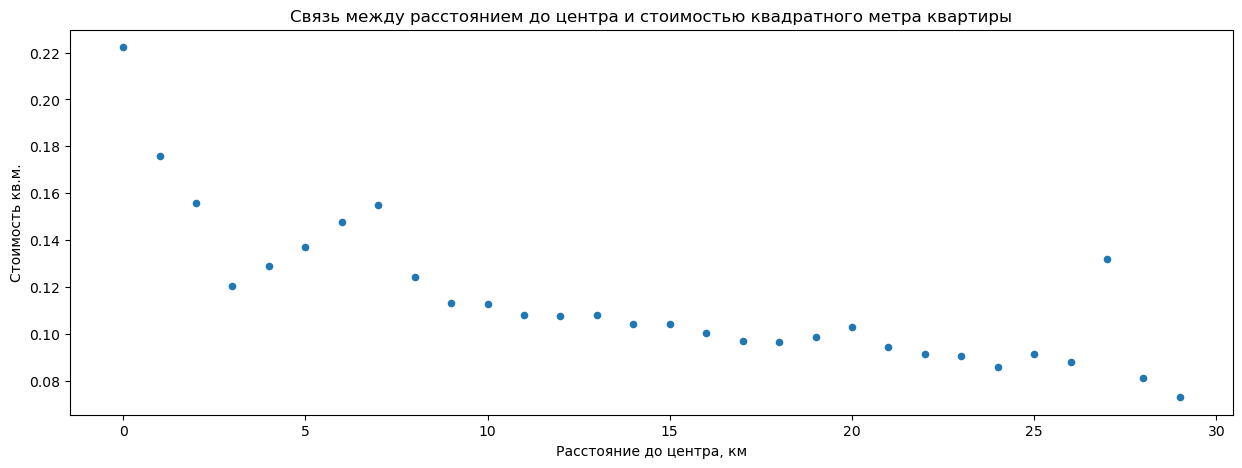

In [53]:
# добавим столбец-указатель по городу Санкт-Петербург
spb = ['санкт-петербург']
df['is_spb'] = df['locality_name'].isin(spb)

# рассчитаем медианную стоимость для каждого километра
area_price = df[df['is_spb']== True].pivot_table(index='city_centers_distance', values='price_per_meter').reset_index()
display(area_price.head(10).style.format({'price_per_meter': '{:.2f}'}))

# построим график
area_price.plot.scatter(['city_centers_distance'], ['price_per_meter'], figsize=(15, 5))
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Стоимость кв.м.')
plt.title('Связь между расстоянием до центра и стоимостью квадратного метра квартиры')
plt.plot()
plt.show()

Видна обратная корреляция - в целом цена за квадратный метр жилья в Санкт-Петербурге падает с каждым километром от центра города.
Центр города заканчивается на 10-м километре, т.к. цена перестаёт резко снижаться.

#### Вывод
Детально изучили объекты в имеющемся датасете:
- Чаще всего на продажу уходит три месяца
- Дороже всего квартиры в Санкт-Петербургах и его пригородах
- Наблюдается корреляция между общей ценой объекта и его площадьми: общей, жилой и кухонной. Корреляция между ценой и количеством комнат менее выражена
- Также наблюдается обратная корреляция между расстоянием до центра СПб и ценой за квадратный метр.

### Общий вывод

В ходе работы была проведена предобработка данных:
- устранены некоторые пропуски, некорректные значения
- оптимизированы названия населенных пунктов.
- удалены аномалии расчёта.

Скорее всего, часть некорректных и пропущенных значений является ошибками ввода, часть - следствием невозможности обработать неполный адрес объекта.
В дальнейшем при сборе данных стоит попытаться контролировать получаемые значения - ограничить высоту потолка, не пропускать общую этажность дома, площадь кухни, жилую площадь.

Из полученного датасета можно сделать вывод, что в центре Петербурга квартиры дороже, чем на окраине или в городах-спутниках. Студии и однушки по цене квадратного метра являются лидерами, но при этом продаются быстрее всего. К тому же и количество их предложений самое большое.\
Декабрь, январь и май - меньше всего размещённых объявлений.\
В 2014 году был пик стоимости за 1 квадратный метр, после кризиса цены упали из-за низкого спроса и начали восстанавливаться только после введения госпрограмм на ипотеки в 2018 году.\
Квартиры на первом и последнем этаже дешевле, чем на других этажах.\
В целом по Ленобласти существует однозначная зависимость между площадью квартиры и ее стоимостью, и между площадью и количеством комнат, что вполне ожидаемо: чем больше площадь квартиры, тем в ней больше комнат и тем она дороже.\
Присутствует связь между общей ценой и ценой 1 кв.м., общей ценой и относительной площадью кухни.\
Для более точной оценки рыночной стоимости квартиры, на мой взгляд, следует учитывать и такие факторы, как расстояние до метро, материал дома, год постройки, наличие лифта, в старом фонде - производился ли капитальный ремонт, электрическая или газовая плита, есть ли горячее водоснабжение или имеется газовая колонка.\
Стоимость квартиры при этом зависит от совокупности всех факторов нелинейно - квартиры в доходных домах в центре ценятся за расположение, историческую и культурную ценность даже при необходимости огромных вложений в ремонт, а однушки в Мурино - за ликвидность и возможность получать доход от сдачи в аренду без особых затрат на ремонт.